In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = '../Datasets/MachineLearningCVE/'

print("Loading Monday file...")
monday = pd.read_csv(DATA_PATH + 'Monday-WorkingHours.pcap_ISCX.csv', low_memory=False)
monday.columns = monday.columns.str.strip()

print(f"✅ Shape: {monday.shape}")
print(f"✅ Label values: {monday['Label'].unique()}")
print(f"✅ First 5 columns: {list(monday.columns[:5])}")
print(f"✅ Memory: {monday.memory_usage(deep=True).sum() / 1e6:.1f} MB")


ModuleNotFoundError: No module named 'pandas'

In [1]:
import sys
print(sys.executable)



/opt/homebrew/Caskroom/mambaforge/base/envs/iot-ids/bin/python


In [2]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn joblib scipy tqdm


100.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.1 MB/s  0:00:00 25.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 17.4 MB/s  0:00:00 14.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.8 MB/s  0:00:007.3 MB/s eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.4 MB/s  0:00:00 23.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 15.3 MB/s  0:00:01 eta 0:00:010:01:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

print(f"✅ pandas: {pd.__version__}")
print(f"✅ numpy: {np.__version__}")
print(f"✅ sklearn: {sklearn.__version__}")
print(f"✅ xgboost: {xgboost.__version__}")
print("\n🎉 All packages working! Ready to load data.")


✅ pandas: 2.3.3
✅ numpy: 2.2.6
✅ sklearn: 1.7.2
✅ xgboost: 3.2.0

🎉 All packages working! Ready to load data.


In [4]:
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = '../Datasets/MachineLearningCVE/'

print("Loading Monday file...")
monday = pd.read_csv(DATA_PATH + 'Monday-WorkingHours.pcap_ISCX.csv', low_memory=False)
monday.columns = monday.columns.str.strip()

print(f"✅ Shape: {monday.shape}")
print(f"✅ Labels: {monday['Label'].unique()}")
print(f"✅ Columns (first 5): {list(monday.columns[:5])}")


Loading Monday file...
✅ Shape: (529918, 79)
✅ Labels: ['BENIGN']
✅ Columns (first 5): ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets']


In [5]:
import os

files = {
    'Monday':        'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday':       'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday':     'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday_Web':  'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday_Inf':  'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday_Morn':   'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday_DDoS':   'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday_Port':   'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
}

dfs = []
for day, filename in files.items():
    filepath = DATA_PATH + filename
    print(f"Loading {day}...", end=' ')
    df_temp = pd.read_csv(filepath, low_memory=False)
    df_temp.columns = df_temp.columns.str.strip()
    df_temp['day'] = day
    dfs.append(df_temp)
    print(f"✅ {df_temp.shape[0]:,} rows")

df = pd.concat(dfs, ignore_index=True)
print(f"\n🎉 Full dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB")



Loading Monday... ✅ 529,918 rows
Loading Tuesday... ✅ 445,909 rows
Loading Wednesday... ✅ 692,703 rows
Loading Thursday_Web... ✅ 170,366 rows
Loading Thursday_Inf... ✅ 288,602 rows
Loading Friday_Morn... ✅ 191,033 rows
Loading Friday_DDoS... ✅ 225,745 rows
Loading Friday_Port... ✅ 286,467 rows

🎉 Full dataset: 2,830,743 rows × 80 columns
Memory: 2.13 GB


ATTACK TYPE DISTRIBUTION
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11

Total unique labels: 15


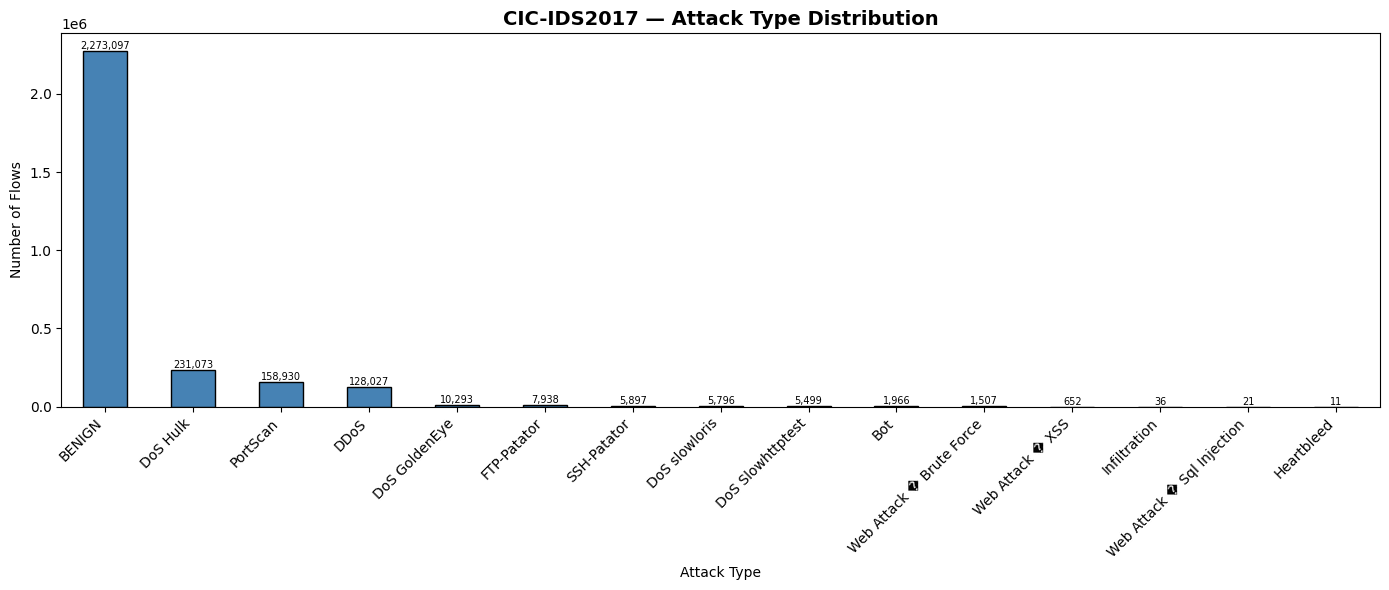

In [6]:
print("="*55)
print("ATTACK TYPE DISTRIBUTION")
print("="*55)
print(df['Label'].value_counts().to_string())
print(f"\nTotal unique labels: {df['Label'].nunique()}")

# Visualize
plt.figure(figsize=(14, 6))
ax = df['Label'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('CIC-IDS2017 — Attack Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type')
plt.ylabel('Number of Flows')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=7)
plt.tight_layout()
plt.savefig('../results/01_attack_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


In [7]:
print("="*55)
print("DATA QUALITY REPORT")
print("="*55)

# Missing values
missing = df.isnull().sum()
print(f"Columns with missing values: {(missing > 0).sum()}")
print(missing[missing > 0])

# Infinite values
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df[numeric_cols]).sum().sum()
print(f"\nInfinite values: {inf_count:,}")

# Duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count:,}")

# Class balance
normal = (df['Label'] == 'BENIGN').sum()
attack = (df['Label'] != 'BENIGN').sum()
total = len(df)
print(f"\nNormal (BENIGN): {normal:,} ({normal/total*100:.1f}%)")
print(f"Attack traffic:  {attack:,} ({attack/total*100:.1f}%)")
print(f"Imbalance ratio: {normal/attack:.1f}:1")


DATA QUALITY REPORT
Columns with missing values: 1
Flow Bytes/s    1358
dtype: int64

Infinite values: 4,376
Duplicate rows: 256,479

Normal (BENIGN): 2,273,097 (80.3%)
Attack traffic:  557,646 (19.7%)
Imbalance ratio: 4.1:1


In [8]:
# Fix infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Binary label (BENIGN=0, Attack=1)
df['binary_label'] = (df['Label'] != 'BENIGN').astype(int)

print(f"✅ Infinite values fixed")
print(f"✅ NaN values filled")
print(f"✅ Binary label added")
print(f"\nBinary label distribution:")
print(df['binary_label'].value_counts())
print(f"\nDataset ready for modelling!")



✅ Infinite values fixed
✅ NaN values filled
✅ Binary label added

Binary label distribution:
binary_label
0    2273097
1     557646
Name: count, dtype: int64

Dataset ready for modelling!


In [9]:
print("Saving processed datasets...")

df.to_pickle('../results/full_dataset.pkl')
print(f"✅ Full dataset saved: {df.shape}")

from sklearn.utils import resample

df_sample = df.groupby('Label', group_keys=False).apply(
    lambda x: x.sample(min(len(x), int(500000 * len(x)/len(df))), random_state=42)
)
df_sample.to_pickle('../results/sample_dataset.pkl')
print(f"✅ Sample dataset saved: {df_sample.shape}")
print(f"\nSample distribution:")
print(df_sample['Label'].value_counts())


Saving processed datasets...
✅ Full dataset saved: (2830743, 81)
✅ Sample dataset saved: (499993, 81)

Sample distribution:
Label
BENIGN                        401501
DoS Hulk                       40814
PortScan                       28072
DDoS                           22613
DoS GoldenEye                   1818
FTP-Patator                     1402
SSH-Patator                     1041
DoS slowloris                   1023
DoS Slowhttptest                 971
Bot                              347
Web Attack � Brute Force         266
Web Attack � XSS                 115
Infiltration                       6
Web Attack � Sql Injection         3
Heartbleed                         1
Name: count, dtype: int64


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import time
import joblib

drop_cols = ['Label', 'binary_label', 'day']
X = df_sample.drop(drop_cols, axis=1)
y = df_sample['binary_label']

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]:,}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")

print("\n🚀 Training Random Forest (this takes 3-5 min)...")
start = time.time()
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = rf.predict(X_test)
inference_time = (time.time() - start) / len(X_test) * 1000

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{'='*50}")
print(f"RANDOM FOREST RESULTS")
print(f"{'='*50}")
print(f"Accuracy:       {acc*100:.2f}%")
print(f"F1-Score:       {f1:.4f}")
print(f"Train time:     {train_time:.1f}s")
print(f"Inference:      {inference_time:.4f} ms/sample")
print(f"\n{classification_report(y_test, y_pred, target_names=['BENIGN','ATTACK'])}")

joblib.dump(rf, '../models/rf_baseline.pkl')
print("✅ Model saved!")


Features: 78
Samples: 499,993
Train: 399,994 | Test: 99,999

🚀 Training Random Forest (this takes 3-5 min)...

RANDOM FOREST RESULTS
Accuracy:       99.87%
F1-Score:       0.9987
Train time:     14.2s
Inference:      0.0021 ms/sample

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     80301
      ATTACK       1.00      1.00      1.00     19698

    accuracy                           1.00     99999
   macro avg       1.00      1.00      1.00     99999
weighted avg       1.00      1.00      1.00     99999

✅ Model saved!


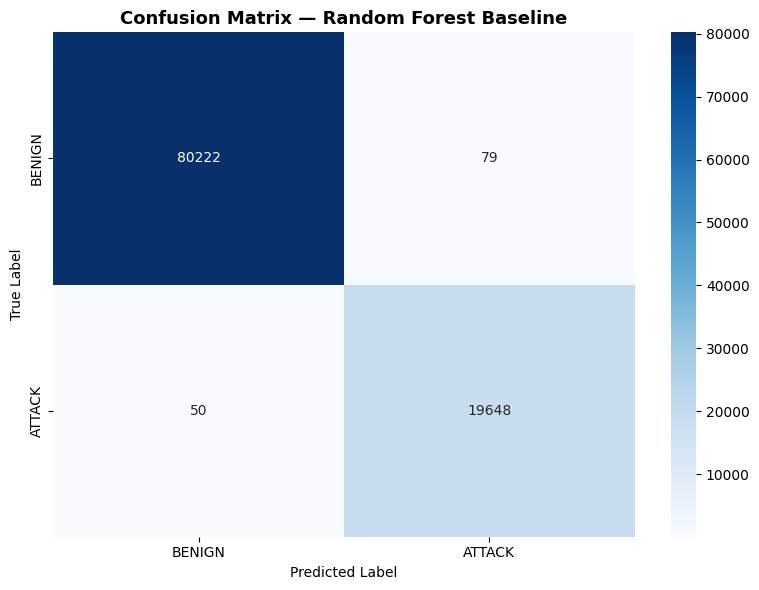

Detection Rate (TPR): 99.75%
False Positive Rate:  0.10%
Target FPR <3%: ✅ Achieved!


In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'ATTACK'],
            yticklabels=['BENIGN', 'ATTACK'])
plt.title('Confusion Matrix — Random Forest Baseline', fontsize=13, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../results/02_confusion_matrix_rf.png', dpi=150, bbox_inches='tight')
plt.show()

tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
print(f"Detection Rate (TPR): {tpr*100:.2f}%")
print(f"False Positive Rate:  {fpr*100:.2f}%")
print(f"Target FPR <3%: {'✅ Achieved!' if fpr < 0.03 else '⚠️ Needs tuning'}")


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_multi = le.fit_transform(df_sample['Label'])

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print("🚀 Training Multi-class RF...")
start = time.time()
rf_multi = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_multi.fit(X_train_m, y_train_m)
train_time = time.time() - start

y_pred_m = rf_multi.predict(X_test_m)
acc_m = accuracy_score(y_test_m, y_pred_m)

print(f"Multi-class Accuracy: {acc_m*100:.2f}%")
print(f"Train time: {train_time:.1f}s")
print(f"\n{classification_report(y_test_m, y_pred_m, target_names=le.classes_)}")

joblib.dump(rf_multi, '../models/rf_multiclass.pkl')
joblib.dump(le, '../models/label_encoder.pkl')
print("✅ Saved!")


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Check class counts in sample
print("Class counts in sample:")
print(df_sample['Label'].value_counts())

# Remove classes with fewer than 10 samples
min_samples = 10
class_counts = df_sample['Label'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df_multi = df_sample[df_sample['Label'].isin(valid_classes)].copy()

print(f"\nRemoved classes with <{min_samples} samples")
print(f"Remaining classes: {df_multi['Label'].nunique()}")
print(f"Remaining samples: {df_multi.shape[0]:,}")

# Encode labels
le = LabelEncoder()
y_multi = le.fit_transform(df_multi['Label'])

# Features
drop_cols = ['Label', 'binary_label', 'day']
X_multi = df_multi.drop(drop_cols, axis=1)

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print(f"\nTrain: {X_train_m.shape[0]:,} | Test: {X_test_m.shape[0]:,}")

# Train
print("\n🚀 Training Multi-class RF...")
start = time.time()
rf_multi = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_multi.fit(X_train_m, y_train_m)
train_time = time.time() - start

y_pred_m = rf_multi.predict(X_test_m)
acc_m = accuracy_score(y_test_m, y_pred_m)

print(f"\n{'='*50}")
print(f"MULTI-CLASS RF RESULTS")
print(f"{'='*50}")
print(f"Accuracy:   {acc_m*100:.2f}%")
print(f"Train time: {train_time:.1f}s")
print(f"\n{classification_report(y_test_m, y_pred_m, target_names=le.classes_)}")

joblib.dump(rf_multi, '../models/rf_multiclass.pkl')
joblib.dump(le, '../models/label_encoder.pkl')
print("✅ Multi-class model saved!")



Class counts in sample:
Label
BENIGN                        401501
DoS Hulk                       40814
PortScan                       28072
DDoS                           22613
DoS GoldenEye                   1818
FTP-Patator                     1402
SSH-Patator                     1041
DoS slowloris                   1023
DoS Slowhttptest                 971
Bot                              347
Web Attack � Brute Force         266
Web Attack � XSS                 115
Infiltration                       6
Web Attack � Sql Injection         3
Heartbleed                         1
Name: count, dtype: int64

Removed classes with <10 samples
Remaining classes: 12
Remaining samples: 499,983

Train: 399,986 | Test: 99,997

🚀 Training Multi-class RF...

MULTI-CLASS RF RESULTS
Accuracy:   99.72%
Train time: 11.8s

                          precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00     80301
                     Bot       0.34      0.90     

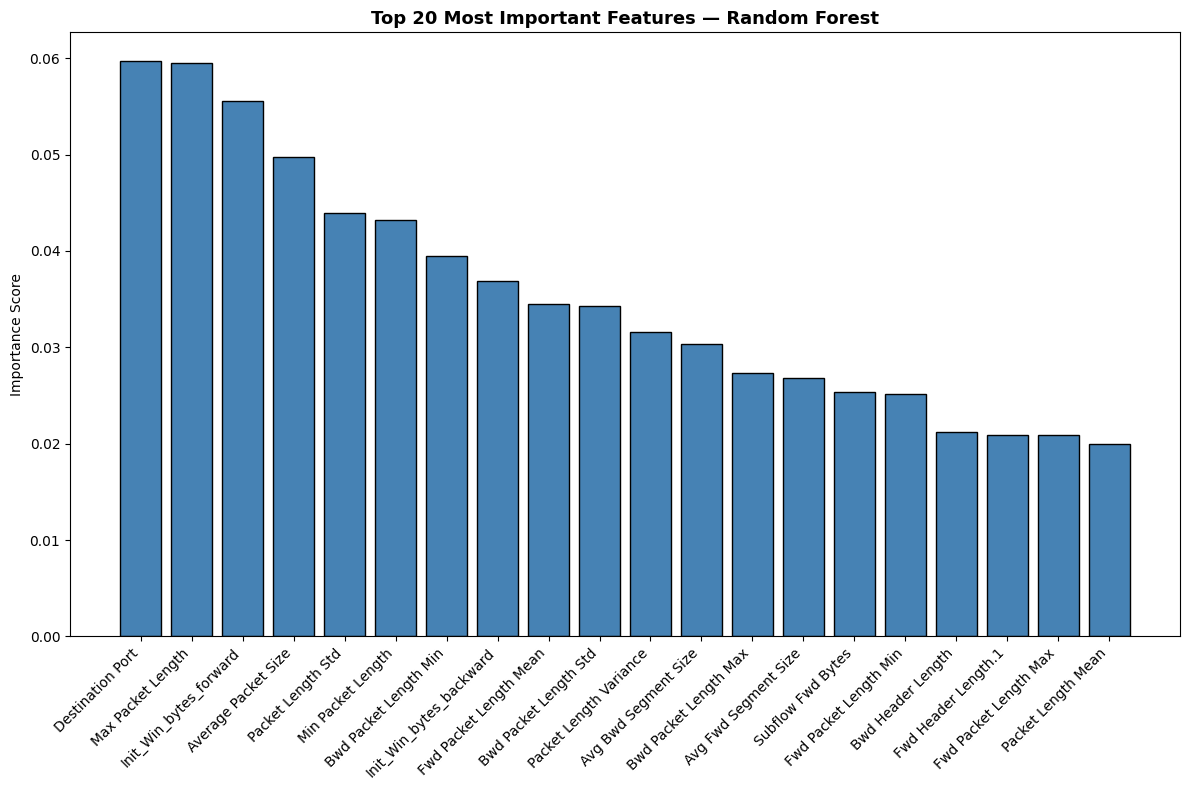

Top 10 features:
  1. Destination Port: 0.0597
  2. Max Packet Length: 0.0595
  3. Init_Win_bytes_forward: 0.0555
  4. Average Packet Size: 0.0498
  5. Packet Length Std: 0.0439
  6. Min Packet Length: 0.0432
  7. Bwd Packet Length Min: 0.0395
  8. Init_Win_bytes_backward: 0.0368
  9. Fwd Packet Length Mean: 0.0345
  10. Bwd Packet Length Std: 0.0342

MODEL SIZES
rf_baseline: 13.1 MB
rf_multiclass: 32.6 MB

Raspberry Pi 4 RAM: 8GB
Target model size: <50MB for edge deployment


In [14]:
# Feature Importance
feature_names = X.columns.tolist()
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12, 8))
plt.bar(range(20), importances[indices], color='steelblue', edgecolor='black')
plt.xticks(range(20), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.title('Top 20 Most Important Features — Random Forest', fontsize=13, fontweight='bold')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('../results/03_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("Top 10 features:")
for i in range(10):
    print(f"  {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Model sizes
import os
models = {
    'rf_baseline': '../models/rf_baseline.pkl',
    'rf_multiclass': '../models/rf_multiclass.pkl'
}
print(f"\n{'='*40}")
print("MODEL SIZES")
print(f"{'='*40}")
for name, path in models.items():
    size = os.path.getsize(path) / 1e6
    print(f"{name}: {size:.1f} MB")
    
print(f"\nRaspberry Pi 4 RAM: 8GB")
print(f"Target model size: <50MB for edge deployment")


In [15]:
# Still in Jupyter — run this now
top20_features = [feature_names[i] for i in indices[:20]]
X_reduced = X[top20_features]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

print("🚀 Training Reduced RF (top 20 features)...")
start = time.time()
rf_reduced = RandomForestClassifier(n_estimators=100, max_depth=20,
    class_weight='balanced', random_state=42, n_jobs=-1)
rf_reduced.fit(X_train_r, y_train_r)

y_pred_r = rf_reduced.predict(X_test_r)
inf_time = (time.time() - start) / len(X_test_r) * 1000
acc_r = accuracy_score(y_test_r, y_pred_r)
tn,fp,fn,tp = confusion_matrix(y_test_r, y_pred_r).ravel()

joblib.dump(rf_reduced, '../models/rf_reduced_top20.pkl')
size_r = os.path.getsize('../models/rf_reduced_top20.pkl') / 1e6

print(f"Accuracy:   {acc_r*100:.2f}%")
print(f"FPR:        {fp/(fp+tn)*100:.2f}%")
print(f"Model size: {size_r:.1f} MB")
print(f"Inference:  {inf_time:.4f} ms/sample")


🚀 Training Reduced RF (top 20 features)...
Accuracy:   99.68%
FPR:        0.36%
Model size: 7.4 MB
Inference:  0.0651 ms/sample


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Check class distribution first
print(df['Label'].value_counts())


Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [17]:
# Merge very rare classes into an "Other" group to avoid SMOTE issues
rare_classes = ['Infiltration', 'Web Attack  Sql Injection', 'Heartbleed']
df['Label'] = df['Label'].apply(lambda x: 'Other Attack' if x in rare_classes else x)
print(df['Label'].value_counts())



Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Other Attack                       47
Web Attack � Sql Injection         21
Name: count, dtype: int64


In [18]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

# Split FIRST, then resample only training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTETomek = SMOTE oversampling + Tomek undersampling (best combo for IDS)
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())


ValueError: could not convert string to float: 'Wednesday'

In [19]:
# Check which columns have non-numeric data
print(df.dtypes[df.dtypes == 'object'])
print(df.shape)


Label    object
day      object
dtype: object
(2830743, 81)


In [20]:
import pandas as pd
import numpy as np

# Drop non-numeric columns except Label
non_numeric = df.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric)

# Remove 'Label' from this list (we need it separately)
cols_to_drop = [col for col in non_numeric if col != ' Label' and col != 'Label']
df_clean = df.drop(columns=cols_to_drop)

print("Remaining non-numeric:", df_clean.select_dtypes(include=['object']).columns.tolist())


Non-numeric columns: ['Label', 'day']
Remaining non-numeric: ['Label']


In [21]:
# CICIDS2017 is known to have inf values — replace them
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna()

print(f"Dataset shape after cleaning: {df_clean.shape}")


Dataset shape after cleaning: (2830743, 80)


In [22]:
from sklearn.model_selection import train_test_split

# Fix label column name — CICIDS2017 has a space: ' Label'
label_col = ' Label' if ' Label' in df_clean.columns else 'Label'

X = df_clean.drop(columns=[label_col])
y = df_clean[label_col].str.strip()  # Remove whitespace from labels

print("X shape:", X.shape)
print("y unique values:", y.unique())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X shape: (2830743, 79)
y unique values: ['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Other Attack' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Bot' 'DDoS' 'PortScan']


In [ ]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Drop 'day' column + handle inf/NaN
df_clean = df.drop(columns=['day'])
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna()

print(f"Shape after cleaning: {df_clean.shape}")

# Fix label column (CICIDS2017 sometimes has leading space)
label_col = ' Label' if ' Label' in df_clean.columns else 'Label'

X = df_clean.drop(columns=[label_col])
y = df_clean[label_col].str.strip()  # removes any whitespace

print("Feature shape:", X.shape)
print("\nClass distribution:\n", y.value_counts())


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Drop 'day' column + handle inf/NaN
df_clean = df.drop(columns=['day'])
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna()

print(f"Shape after cleaning: {df_clean.shape}")

# Fix label column (CICIDS2017 sometimes has leading space)
label_col = ' Label' if ' Label' in df_clean.columns else 'Label'

X = df_clean.drop(columns=[label_col])
y = df_clean[label_col].str.strip()  # removes any whitespace

print("Feature shape:", X.shape)
print("\nClass distribution:\n", y.value_counts())


NameError: name 'df' is not defined

In [2]:
import pandas as pd
import numpy as np
import glob
import os

# Load all CSV files from both dataset folders
folder1 = "Datasets/MachineLearningCVE/"
folder2 = "Datasets/TrafficLabelling /"  # Note the space in folder name

files1 = glob.glob(folder1 + "*.csv")
files2 = glob.glob(folder2 + "*.csv")
all_files = files1 + files2

print(f"Found {len(all_files)} CSV files:")
for f in all_files:
    print(f"  {f}")


Found 0 CSV files:


In [3]:
import os

# Check current working directory
print("Current directory:", os.getcwd())

# List everything in current directory
print("\nContents:")
for item in os.listdir('.'):
    print(f"  {item}")



Current directory: /Users/malharfalke/College/Btech_Project /code

Contents:
  01_Dataset_EDA .ipynb
  .ipynb_checkpoints


In [4]:
import os

# Check current working directory
print("Current directory:", os.getcwd())

# List everything in current directory
print("\nContents:")
for item in os.listdir('.'):
    print(f"  {item}")


Current directory: /Users/malharfalke/College/Btech_Project /code

Contents:
  01_Dataset_EDA .ipynb
  .ipynb_checkpoints


In [5]:
import os

# Go one level up and check
parent = '/Users/malharfalke/College/Btech_Project '
print("Contents of Btech_Project:")
for item in os.listdir(parent):
    print(f"  {item}")


Contents of Btech_Project:
  .DS_Store
  Literature
  code
  models
  README.md
  results
  .gitignore
  .git


In [6]:
import subprocess

result = subprocess.run(
    ['find', '/Users/malharfalke', '-name', '*.pcap_ISCX.csv', '-type', 'f'],
    capture_output=True, text=True, timeout=60
)
print(result.stdout if result.stdout else "No files found")
print(result.stderr if result.stderr else "")



No files found
find: /Users/malharfalke/Library/Application Support/MobileSync: Operation not permitted
find: /Users/malharfalke/Library/Application Support/CallHistoryTransactions: Operation not permitted
find: /Users/malharfalke/Library/Application Support/CloudDocs: Operation not permitted
find: /Users/malharfalke/Library/Application Support/com.apple.sharedfilelist: Operation not permitted
find: /Users/malharfalke/Library/Application Support/Knowledge: Operation not permitted
find: /Users/malharfalke/Library/Application Support/com.apple.TCC: Operation not permitted
find: /Users/malharfalke/Library/Application Support/FileProvider: Operation not permitted
find: /Users/malharfalke/Library/Application Support/AddressBook: Operation not permitted
find: /Users/malharfalke/Library/Application Support/FaceTime: Operation not permitted
find: /Users/malharfalke/Library/Application Support/DifferentialPrivacy: Operation not permitted
find: /Users/malharfalke/Library/Application Support/com.

In [7]:
import os
import glob
import pandas as pd
import numpy as np

# Set path
DATA_PATH = '/Users/malharfalke/College/Btech_Project /Datasets/MachineLearningCVE/'

# Check files
files = glob.glob(DATA_PATH + '*.csv')
print(f"Found {len(files)} CSV files:")
for f in files:
    size = os.path.getsize(f) / (1024*1024)
    print(f"  {os.path.basename(f)} — {size:.1f} MB")


Found 0 CSV files:


In [8]:
import os
import glob
import pandas as pd
import numpy as np

# Set path
DATA_PATH = '/Users/malharfalke/College/Btech_Project /Datasets/MachineLearningCVE/'

# Check files
files = glob.glob(DATA_PATH + '*.csv')
print(f"Found {len(files)} CSV files:")
for f in files:
    size = os.path.getsize(f) / (1024*1024)
    print(f"  {os.path.basename(f)} — {size:.1f} MB")



Found 8 CSV files:
  Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv — 79.3 MB
  Monday-WorkingHours.pcap_ISCX.csv — 168.7 MB
  Friday-WorkingHours-Morning.pcap_ISCX.csv — 55.6 MB
  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv — 73.3 MB
  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv — 73.6 MB
  Tuesday-WorkingHours.pcap_ISCX.csv — 128.8 MB
  Wednesday-workingHours.pcap_ISCX.csv — 214.7 MB
  Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv — 49.6 MB


In [9]:
# Load all CSVs
dfs = []
for f in files:
    try:
        temp = pd.read_csv(f, low_memory=False)
        temp.columns = temp.columns.str.strip()  # Remove whitespace from column names
        print(f"✅ {os.path.basename(f)} — {temp.shape}")
        dfs.append(temp)
    except Exception as e:
        print(f"❌ Failed: {os.path.basename(f)} — {e}")

# Combine all files
df = pd.concat(dfs, ignore_index=True)
print(f"\nFull dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['Label'].value_counts()}")



✅ Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv — (288602, 79)
✅ Monday-WorkingHours.pcap_ISCX.csv — (529918, 79)
✅ Friday-WorkingHours-Morning.pcap_ISCX.csv — (191033, 79)
✅ Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv — (286467, 79)
✅ Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv — (225745, 79)
✅ Tuesday-WorkingHours.pcap_ISCX.csv — (445909, 79)
✅ Wednesday-workingHours.pcap_ISCX.csv — (692703, 79)
✅ Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv — (170366, 79)

Full dataset shape: (2830743, 79)

Class distribution:
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS   

In [10]:
# ── Step 1: Clean ──────────────────────────────────────────
# Fix encoding issues in label names
df['Label'] = df['Label'].str.strip()
df['Label'] = df['Label'].replace({
    'Web Attack \x96 Brute Force': 'Web Attack Brute Force',
    'Web Attack \x96 XSS':         'Web Attack XSS',
    'Web Attack \x96 Sql Injection':'Web Attack Sql Injection'
})

# Drop inf and NaN (common in Flow Bytes/s column)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print(f"Shape after cleaning: {df.shape}")

# ── Step 2: Group rare classes ─────────────────────────────
rare = ['Infiltration', 'Web Attack Sql Injection', 'Heartbleed']
df['Label'] = df['Label'].apply(lambda x: 'Other Attack' if x in rare else x)
print(f"\nFinal class distribution:\n{df['Label'].value_counts()}")

# ── Step 3: Split features and labels ─────────────────────
X = df.drop(columns=['Label'])
y = df['Label']

print(f"\nFeature shape: {X.shape}")
print(f"Label shape:   {y.shape}")


Shape after cleaning: (2827876, 79)

Final class distribution:
Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Other Attack                       47
Web Attack � Sql Injection         21
Name: count, dtype: int64

Feature shape: (2827876, 78)
Label shape:   (2827876,)


In [11]:
# ── Fix encoding with a catch-all approach ─────────────────
df['Label'] = df['Label'].apply(lambda x: 
    'Web Attack Brute Force' if 'Brute' in str(x) else
    'Web Attack XSS'         if 'XSS'   in str(x) else
    'Web Attack Sql'         if 'Sql'   in str(x) else x
)

# Group rare classes again
rare = ['Infiltration', 'Web Attack Sql', 'Heartbleed', 'Other Attack']
df['Label'] = df['Label'].apply(lambda x: 'Other Attack' if x in rare else x)

print("Final class distribution:")
print(df['Label'].value_counts())
print(f"\nTotal classes: {df['Label'].nunique()}")


Final class distribution:
Label
BENIGN                    2271320
DoS Hulk                   230124
PortScan                   158804
DDoS                       128025
DoS GoldenEye               10293
FTP-Patator                  7935
SSH-Patator                  5897
DoS slowloris                5796
DoS Slowhttptest             5499
Bot                          1956
Web Attack Brute Force       1507
Web Attack XSS                652
Other Attack                   68
Name: count, dtype: int64

Total classes: 13


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test:  {X_test.shape}")
print(f"\nTrain class distribution:\n{y_train.value_counts()}")



Train: (2262300, 78)
Test:  (565576, 78)

Train class distribution:
Label
BENIGN                    1817055
DoS Hulk                   184099
PortScan                   127043
DDoS                       102420
DoS GoldenEye                8234
FTP-Patator                  6348
SSH-Patator                  4718
DoS slowloris                4637
DoS Slowhttptest             4399
Bot                          1565
Web Attack Brute Force       1206
Web Attack XSS                522
Other Attack                   54
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# ── Step 1: Scale ──────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("✅ Scaling done")

# ── Step 2: Train Random Forest ────────────────────────────
print("\nTraining Random Forest...")
start = time.time()

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,          # use all CPU cores
    max_depth=20,       # limit depth to speed up training
    min_samples_leaf=5
)
rf.fit(X_train_scaled, y_train)

elapsed = time.time() - start
print(f"✅ Training done in {elapsed/60:.1f} minutes")

# ── Step 3: Evaluate ───────────────────────────────────────
y_pred = rf.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Scaling done

Training Random Forest...
✅ Training done in 1.5 minutes

Classification Report:
                        precision    recall  f1-score   support

                BENIGN       1.00      1.00      1.00    454265
                   Bot       0.20      0.99      0.33       391
                  DDoS       1.00      1.00      1.00     25605
         DoS GoldenEye       0.99      1.00      0.99      2059
              DoS Hulk       0.99      1.00      1.00     46025
      DoS Slowhttptest       0.99      0.99      0.99      1100
         DoS slowloris       1.00      1.00      1.00      1159
           FTP-Patator       1.00      1.00      1.00      1587
          Other Attack       1.00      0.57      0.73        14
              PortScan       0.99      1.00      1.00     31761
           SSH-Patator       1.00      1.00      1.00      1179
Web Attack Brute Force       0.79      0.67      0.73       301
        Web Attack XSS       0.39      0.60      0.47       130

     

In [14]:
import joblib
import os

# Create models folder if not exists
os.makedirs('../models', exist_ok=True)
os.makedirs('../results', exist_ok=True)

# Save model and scaler
joblib.dump(rf, '../models/random_forest_v1.pkl')
joblib.dump(scaler, '../models/scaler_v1.pkl')
print("✅ Model saved")

# Save classification report as CSV
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('../results/rf_classification_report.csv')
print("✅ Results saved")
print(report_df.round(3))


✅ Model saved
✅ Results saved
                        precision  recall  f1-score     support
BENIGN                      1.000   0.995     0.998  454265.000
Bot                         0.196   0.995     0.328     391.000
DDoS                        1.000   0.999     1.000   25605.000
DoS GoldenEye               0.993   0.995     0.994    2059.000
DoS Hulk                    0.993   1.000     0.996   46025.000
DoS Slowhttptest            0.992   0.992     0.992    1100.000
DoS slowloris               0.996   0.997     0.997    1159.000
FTP-Patator                 1.000   0.999     1.000    1587.000
Other Attack                1.000   0.571     0.727      14.000
PortScan                    0.995   1.000     0.997   31761.000
SSH-Patator                 1.000   0.999     1.000    1179.000
Web Attack Brute Force      0.792   0.671     0.727     301.000
Web Attack XSS              0.392   0.600     0.474     130.000
accuracy                    0.996   0.996     0.996       0.996
macro avg 

In [15]:
# Install if needed
# pip install xgboost

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# XGBoost needs numeric labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

print("Classes:", list(le.classes_))

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

import time
start = time.time()
xgb.fit(X_train_scaled, y_train_enc)
print(f"✅ XGBoost trained in {(time.time()-start)/60:.1f} minutes")

y_pred_xgb = le.inverse_transform(xgb.predict(X_test_scaled))
print(classification_report(y_test, y_pred_xgb))


Classes: ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Other Attack', 'PortScan', 'SSH-Patator', 'Web Attack Brute Force', 'Web Attack XSS']


/opt/homebrew/Caskroom/mambaforge/base/envs/iot-ids/lib/python3.10/site-packages/xgboost/training.py:200: UserWarning: [19:09:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost trained in 2.6 minutes
                        precision    recall  f1-score   support

                BENIGN       1.00      1.00      1.00    454265
                   Bot       0.96      0.73      0.83       391
                  DDoS       1.00      1.00      1.00     25605
         DoS GoldenEye       1.00      0.99      1.00      2059
              DoS Hulk       1.00      1.00      1.00     46025
      DoS Slowhttptest       0.99      0.99      0.99      1100
         DoS slowloris       1.00      1.00      1.00      1159
           FTP-Patator       1.00      1.00      1.00      1587
          Other Attack       1.00      0.57      0.73        14
              PortScan       0.99      1.00      1.00     31761
           SSH-Patator       1.00      1.00      1.00      1179
Web Attack Brute Force       0.71      0.91      0.79       301
        Web Attack XSS       0.38      0.15      0.22       130

              accuracy                           1.00    565576
     

In [16]:
import joblib, os
import pandas as pd
from sklearn.metrics import classification_report

os.makedirs('../models', exist_ok=True)
os.makedirs('../results', exist_ok=True)

# Save models
joblib.dump(rf,     '../models/random_forest_v1.pkl')
joblib.dump(xgb,    '../models/xgboost_v1.pkl')
joblib.dump(scaler, '../models/scaler_v1.pkl')
joblib.dump(le,     '../models/label_encoder_v1.pkl')
print("✅ All models saved")

# Save reports
rf_report  = pd.DataFrame(classification_report(y_test, y_pred,     output_dict=True)).transpose()
xgb_report = pd.DataFrame(classification_report(y_test, y_pred_xgb, output_dict=True)).transpose()

rf_report.to_csv('../results/rf_report.csv')
xgb_report.to_csv('../results/xgb_report.csv')
print("✅ Reports saved")


✅ All models saved
✅ Reports saved


In [17]:
from imblearn.over_sampling import SMOTE

# Only oversample the weakest classes
smote = SMOTE(
    sampling_strategy={
        'Web Attack XSS':        2000,
        'Web Attack Brute Force': 3000,
        'Bot':                    3000,
        'Other Attack':           1000,
    },
    random_state=42,
    k_neighbors=3   # small k because some classes have very few samples
)

X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
print("After targeted SMOTE:")
print(pd.Series(y_train_sm).value_counts())


After targeted SMOTE:
Label
BENIGN                    1817055
DoS Hulk                   184099
PortScan                   127043
DDoS                       102420
DoS GoldenEye                8234
FTP-Patator                  6348
SSH-Patator                  4718
DoS slowloris                4637
DoS Slowhttptest             4399
Bot                          3000
Web Attack Brute Force       3000
Web Attack XSS               2000
Other Attack                 1000
Name: count, dtype: int64


In [18]:
from xgboost import XGBClassifier
import time

# Encode new labels
y_train_sm_enc = le.transform(y_train_sm)

# Train XGBoost on SMOTE-balanced data
xgb_sm = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

start = time.time()
xgb_sm.fit(X_train_sm, y_train_sm_enc)
print(f"✅ Trained in {(time.time()-start)/60:.1f} minutes")

# Evaluate
y_pred_sm = le.inverse_transform(xgb_sm.predict(X_test_scaled))
print("\nClassification Report (XGBoost + SMOTE):")
print(classification_report(y_test, y_pred_sm))


✅ Trained in 1.4 minutes

Classification Report (XGBoost + SMOTE):
                        precision    recall  f1-score   support

                BENIGN       1.00      1.00      1.00    454265
                   Bot       0.77      0.88      0.82       391
                  DDoS       1.00      1.00      1.00     25605
         DoS GoldenEye       1.00      0.99      1.00      2059
              DoS Hulk       1.00      1.00      1.00     46025
      DoS Slowhttptest       0.99      0.99      0.99      1100
         DoS slowloris       1.00      1.00      1.00      1159
           FTP-Patator       1.00      1.00      1.00      1587
          Other Attack       0.90      0.64      0.75        14
              PortScan       0.99      1.00      1.00     31761
           SSH-Patator       1.00      1.00      1.00      1179
Web Attack Brute Force       0.77      0.73      0.75       301
        Web Attack XSS       0.44      0.52      0.47       130

              accuracy             

In [ ]:
# Save best model
joblib.dump(xgb_sm, '../models/xgboost_smote_v1.pkl')
print("✅ Best model saved")

# Save final report
final_report = pd.DataFrame(
    classification_report(y_test, y_pred_sm, output_dict=True)
).transpose()
final_report.to_csv('../results/xgboost_smote_report.csv')
print("✅ Final report saved")
print(final_report.round(3))
